# Exclusion functions
Simple usage 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from gzpt import hzpt
from gzpt.tracers import AutoCorrelator

klin,plin = np.loadtxt('../tests/test_plin_planck_z0.55.txt',unpack=True) #load some input linear power
model = hzpt(klin,plin) #instantiate the hzpt model (at the plin cosmology)
kk = np.logspace(-3,1)
rr = np.logspace(-1,2)

## Configuration space

### $F_{\rm{exc}}(r)$

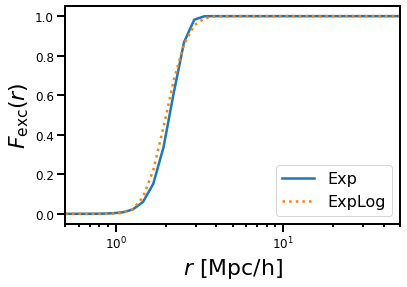

In [24]:
hh = AutoCorrelator([1e-3,2,350,30,5],model,params_exc=[1])
hh0 = AutoCorrelator([1e-3,2,350,30,5],model)

Fr_Exp = hh.Fr_excl(rr,2)
Fr_ExpLog = hh.Fr_excl(rr,2,.1)
plt.plot(rr,Fr_Exp,label='Exp') 
plt.plot(rr,Fr_ExpLog,ls=':',label='ExpLog') 
plt.xlim(.5,50)
plt.xscale('log')
plt.legend()
plt.xlabel(r'$r \ [\rm{Mpc}/h]$')
plt.ylabel(r'$F_{\rm{exc}}(r) $')
plt.show()

### Model with and without exclusion

R,sigma [1] None


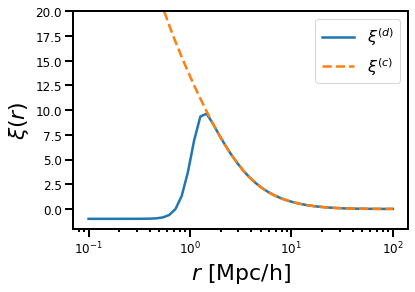

In [27]:
plt.plot(rr,hh.Xi()(rr),label=r'$\xi^{(d)}$')
plt.plot(rr,hh0.Xi()(rr),label=r'$\xi^{(c)}$',ls='--') 
plt.xscale('log')
plt.legend()
plt.xlabel(r'$r \ [\rm{Mpc}/h]$')
plt.ylabel(r'$\xi(r) $')
plt.ylim(-2,20)
plt.show()

## Fourier space

### $F_{\rm{exc}}(k)$

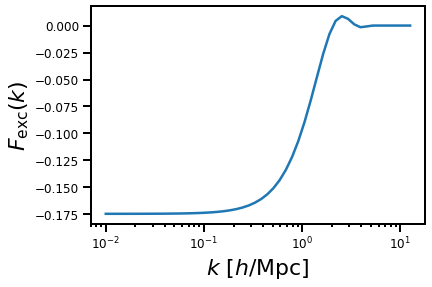

In [17]:
nbar=1e-4
hh = AutoCorrelator([nbar,4,350,30,5],model,params_exc=[2])
hh0 = AutoCorrelator([nbar,4,350,30,5],model)
Fk = hh.Fk_excl(kk,2)
plt.semilogx(kk,Fk) #very similar to k-space top-hat, but slope is slightly different
plt.xlabel(r'$k \ [h/\rm{Mpc}]$')
plt.ylabel(r'$F_{\rm{exc}}(k) $')
plt.show()

### Model with and without exclusion

Text(0, 0.5, '$P(k) \\ [\\rm{Mpc}/h]^{3}$')

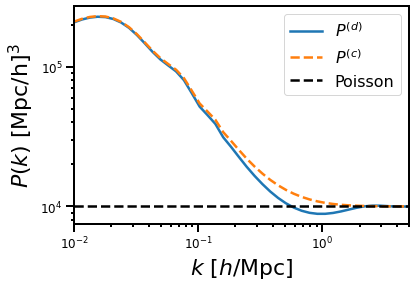

In [15]:
plt.loglog(kk,hh.Power()(kk),label=r'$P^{(d)}$')
plt.loglog(kk,hh0.Power()(kk),ls='--',label=r'$P^{(c)}$')
plt.axhline(1/nbar,ls='--',c='k',label='Poisson')
plt.xlim(1e-2,5)
plt.legend()
plt.xlabel(r'$k \ [h/\rm{Mpc}]$')
plt.ylabel(r'$P(k) \ [\rm{Mpc}/h]^{3}$')